<a href="https://colab.research.google.com/github/Nayeong127/class2021Spring/blob/main/%EA%B8%B0%EB%A7%90_%EA%B3%B5%EB%B6%80_%EC%99%84%EC%A0%84_%EB%B6%80%EC%88%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter
#필요한 패키지임

# Phasor

저 파란색 점점점 무언가/ 2차원, 3차원도 가능

모음을 만들기 위해!!pure tone(싸인웨이브)을 만들어서 source만들거야

1. time 2, phase, 3. sine(phase), 4, plot(x-time,y-sin)

In [17]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

#amplitude는 진폭. 싸인웨이브나 사운드웨이브에서 볼 수 있는 웨이브 크기 같은 거!
#sr:sampling rate: 점들이 1초에 몇 개의 샘플이 들어갈 것인가~ 단위 Hz
#duration: 얼만큼 긴 싸인 웨이브를 만들건가~ 0.5초 짜리~
#frequency는 반복되는 단위를 싸이클이라고 하는데, 1초에 싸이클이 몇 개 들어가게 할까? -> 소리의 높낮이
#Hz 단위는 1초에 몇 개 들어가는가~ 니까 샘플링 레잍, 프리퀜시 모두 헤르쯔 쓸 수 있음. 

얘는 4번 반복되니까 freq 4Hz
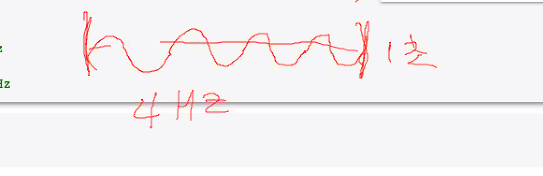

In [18]:
# generate time
t = np.arange(1, sr * dur+1)/sr

#그 다음으로 할 건 시간을 만드는 거야. 
#싸인웨이브는 시간의 개념이 없어서 
#각도값(phase)와 시간을 sync시켜야해.
#sr있어야 시간을 만들 수 있어. sr 자체가 시간을 몇 개로 만들 것인가~를 말해주는 것!
#np.arange(0,10) 하면 (0,1,2,3,4,...9)이니까
# np.arange(1, sr * dur+1)는1에서 sr * dur+1 전까지 만들어냄.
#여기선 sr 만이고 dur 0.5니까 np.arange(1, sr * dur+1)/sr는 1부터5001이넹?! -> [1,2,...5000]/10000
#[1/10000,2/10000,...,5000/10000]저걸 하면 마지막껀 0.5초
#이거 중요해~~~~

#시간을 만드는 건 샘플링레잍을 설정한다!
#설정하고 t=[0.0001,0.0002,..]이렇게 만들어서 식을 만든거야

시간과 phase 싱크시키는 거~
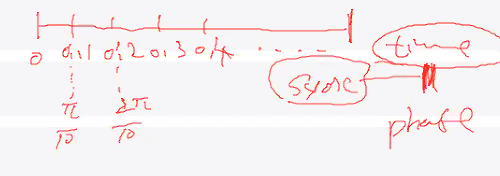

In [19]:
# generate phase
theta = t * 2*np.pi * freq   
#phase(각도 in radian) 
#위에서 시간을 만들었지. 
#1초*2파이 하면 한 바퀴 짜리 사인 웨이브 만든 거임. 사진 참고해
#1초*2파이*100(frequency) 하면 이 바퀴만큼 도는 phase임!!
#2*np.pi 이게 2파이 쓰는 거
#시간과 phase가 모두 t로 연결되어 있어 그러니까

바퀴, 라디안, 각도

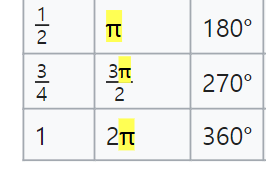

1초*2파이 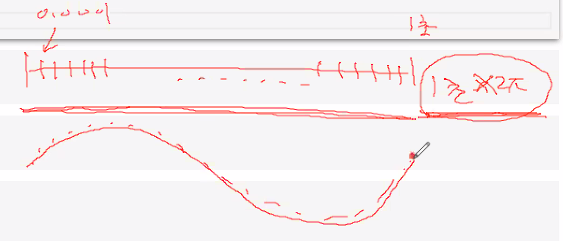

In [ ]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)

#싸인웨이브 만들 때 싸인이라는 함수 쓸 거야. 여기에 radian 값이 들어가(각도값)
#in radian!! 레이디안 형태로 바꿔야해//// 2파이=360, 파이=180, 0=0
#np.sin 함수가 싸인 함수임~

# **잠시 여긴 0428의 필기임**



In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

In [ ]:
theta=np.pi #얘 지금 180이다
np.sin(theta)

1.2246467991473532e-16

1.2246467991473532e-16
-16은 유효숫자. 0.000000000012라는 뜻~


In [ ]:
theta=np.pi/6 #얘 지금 30도다
np.sin(theta)

0.49999999999999994

In [ ]:
theta=np.pi*0 #얘 지금 0이다
np.sin(theta)

0.0

i 대신 1j라고 쓰는 거임~

e와 i는 상수/// e는 2.71.... i는 복소수

고로 e^쎄타i는 항상 복소수!!! a+bi꼴로 나타낼 수 있지.

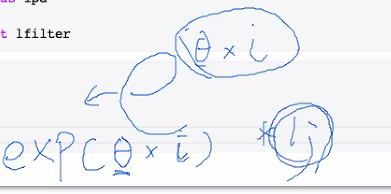

In [ ]:
theta=np.pi*0
np.exp(theta*1j)

(1+0j)

이거 찍으면 (1,0)

In [ ]:
theta=np.pi/2
np.exp(theta*1j)

(6.123233995736766e-17+1j)

In [ ]:
theta=np.pi
np.exp(theta*1j)

(-1+1.2246467991473532e-16j)

-1,0i
->(-1,0)

In [ ]:
theta=np.pi*3/2
np.exp(theta*1j)

(-1.8369701987210297e-16-1j)

0-i
(0,-1)

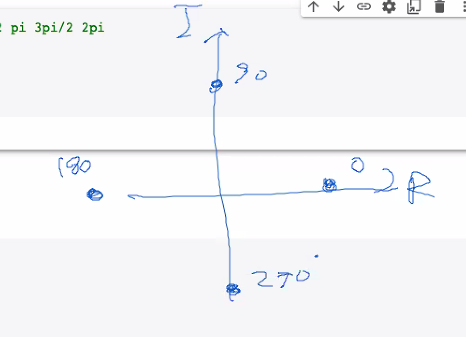


규칙성이 있다. 이걸 다 이으면 동그라미가 될듯?!
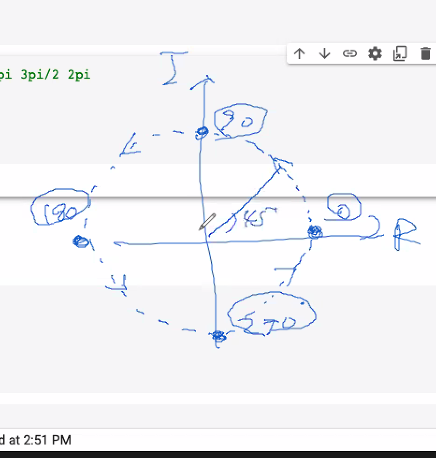

이건 0503

허수 부분이 0이면 수직선~ 0 아니면 2차원 그래프 가능!

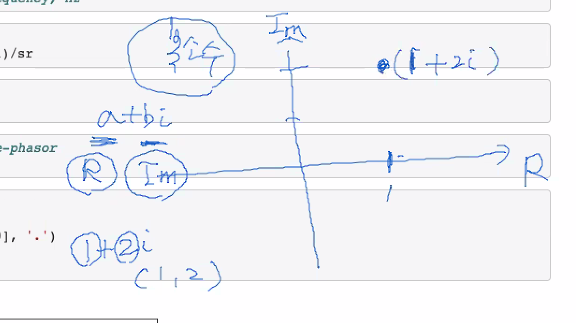

0503 
phasor



-sinusoidal wave-> cos, sin의 pure tone/ 처음 시작을 어디서 하는 가가 싸인코싸인 구분.

1. sin-> sin(쎄타) -)실수 a값으로 나옴
  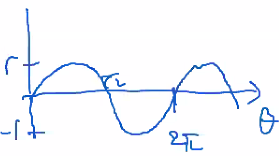
2. complex -> e^쎄타i
  i가 있기 때문에 저거 계산하면 복소수임.
  어떤 각도 값을 넣으면 a+bi값이 나옴
  실수부(r), 허수부(i)해서 2차원으로 한다 했지.  (a,b)
  쎄타가 0일 때 1이 나옴 ->(1,0)
  쎄타가 90일 때(pi/2) -> (0,1)
    pi ->(-1,0)
    3/2 pi ->(0,-1)
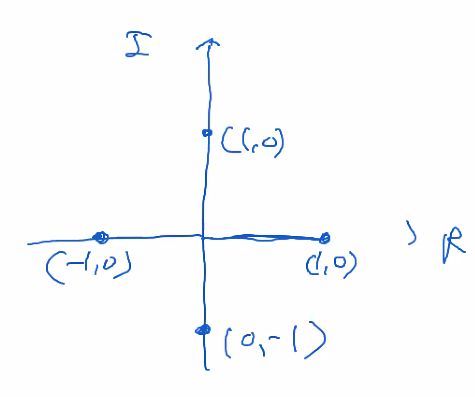

각도 계산 (1,0)을 0도, (1,0)을 90, (-1,0)을 180~


complex에서 복소수의 제곱을 알아보겠다
*   (1,1)는 1+i 니까 제곱하면 2i -> (0,2)
> * (1,1)은 pi/4(45도). 제곱하니까 (pi/2)90이 됐네!!!

알아야 할 것ㅣ 


*  제곱하면 1을 유지한 채 각도만 두 배,
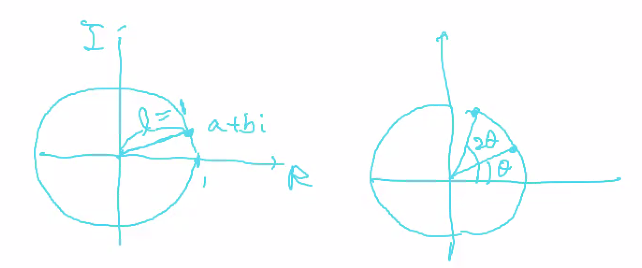

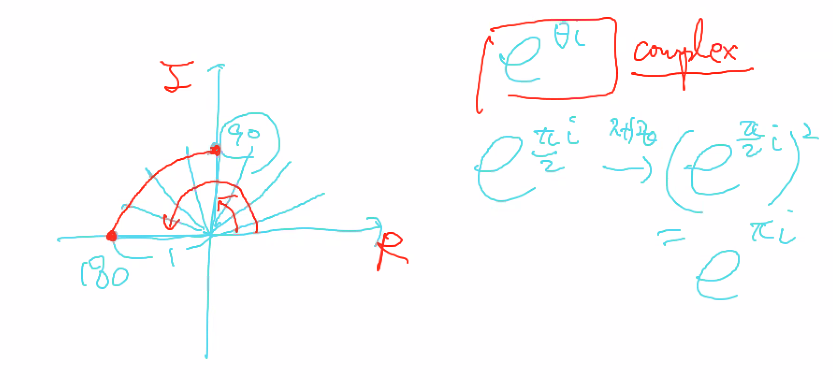
*   1이 아닌 거 제곱하면 각도값 두 배, 그리고 1보다 더 커짐








시간의 개념을 넣으면 입체가 됨
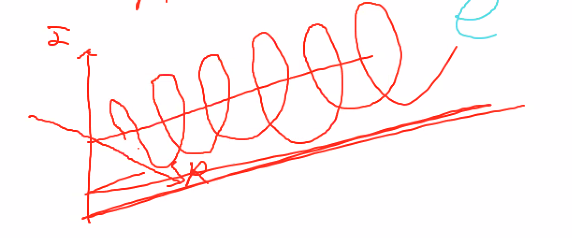

# **다시 돌아와**

Text(0, 0.5, 'real')

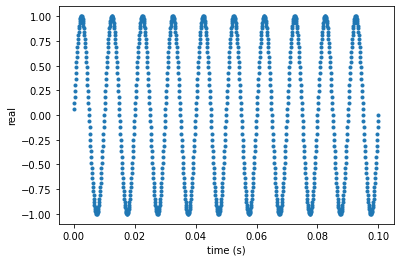

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

#plt는 matplotlib의 pyplot이공
#figure 함수 이용해서 그래프
#plot 함수는 x,y에 들어올 값들 적으면 됩니다.
#x=[1,2,3]이고 y가 [-1,0,1]이면 (1,-1), (2,0) (3,1) 으로 점 찍는 거임
#여기선 시간이 엑스축(phase 아님!!!!!!!!!!!!!)
#plot(t,s)의 여기서 t의 sample 개수는?! 5000. 1초 동안은?! 10000개.

Text(0, 0.5, 'real')

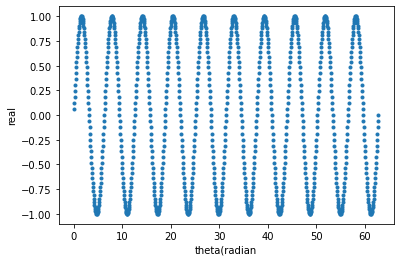

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta[0:1000], s[0:1000], '.')
ax.set_xlabel('theta(radian')
ax.set_ylabel('real')
#x축을 theta로 해서 값이 크죠. 초 단위가 아니라 radian 단위라서

Text(0, 0.5, 'real')

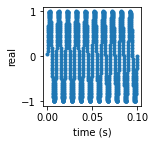

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(235)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
#subplot바꾸니까 작아짐!235하면 2 by 3중 5번째
#111하면 저렇게 됨

ValueError: ignored

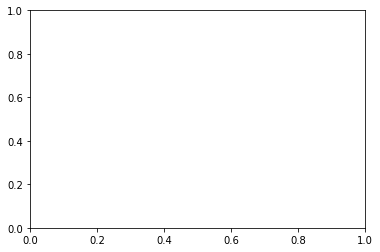

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1001], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
#plot 뒤에 두 숫자 다르면 오류

In [ ]:
ipd.Audio(s, rate=sr)

#얘로 소리 듣기~
#최종 s와 sr 써주면 됨~
#뭐 바꾸고 싶으면 위에꺼 (그림 그리는 거 빼고) 다시 실행해야함!!!

In [ ]:
#수업 과제로 phasor 함수 만들기 
def phasor(amp,sr,dur,freq):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = np.sin(theta)
  return(s,theta,t)

In [ ]:
phasor(1,10000,0.5,100)

(array([ 6.27905195e-02,  1.25333234e-01,  1.87381315e-01, ...,
        -1.25333234e-01, -6.27905195e-02,  1.96438672e-15]),
 array([6.28318531e-02, 1.25663706e-01, 1.88495559e-01, ...,
        3.14033602e+02, 3.14096434e+02, 3.14159265e+02]),
 array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
        5.000e-01]))

In [20]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j)
#얜 컴플렉스여~ 위엔 싸인이었어~
#exp는 exponential 

Text(0.5, 0, 'imag')

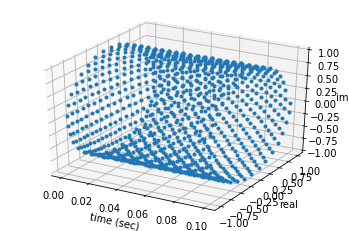

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') #여기 중요
ax.set_xlabel('time (sec)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

#x는 시간이지. y는 a값(실수), z축은 허수부(b) 3차원.
#세 값 필요해 (0,0,0) 벡터처럼~

In [ ]:
#위엔 그림을 자세히 못 봐서 이 패키지 가져와서 자세히 볼 거임. 
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:200], c.real[0:200], c.imag[0:200] #더 자세히 보려고 0부터 1000 안 하고 200까지함. 이거 축 잘 봐라.
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()


#x에 time, y real, z imag
#(a+bi)에서 a가 real, b가 ima

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:300], c.real[0:300], c.imag[0:300]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.show()

#300까지만 플라팅
#complex phasor에 실수부에 해당하는 건(y축)은 코싸인, z축은 싸인 곡선이라 싸인 코싸인 둘다 갖고 있는 거임!!

참고하렴
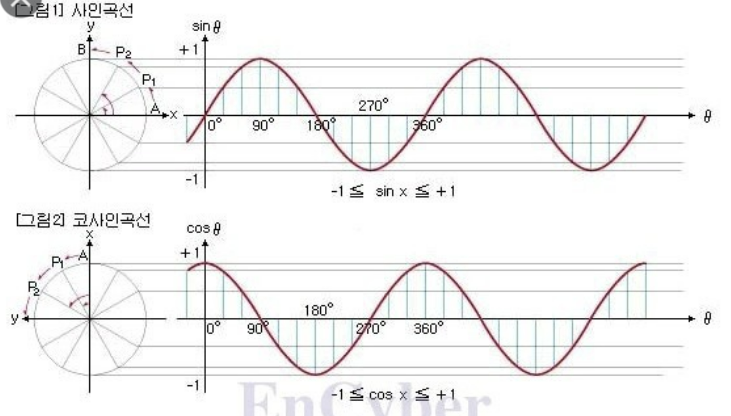

쎼타에 0~2pi까지 100개 숫자 쭉 했을 때 a+bi의 실수부만 보면 cos(쎄타)/ 허수 부분만 보면 sin(쎄타)

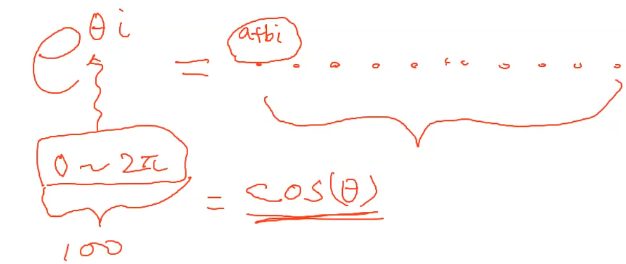

허수부분만 보는 건데 이거 싸인 곡선이랑 닮음.  실수 안 보고 있음.

실수부분도 보려면 위에서 봐야 함
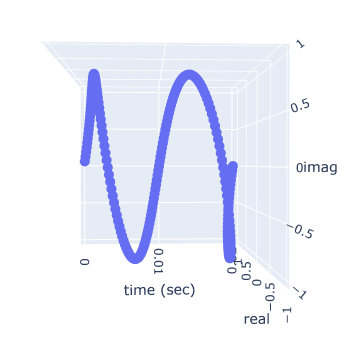

이건 실수부분만 볼거양 이건 시작이 달라! 코사인 곡선과 닮음
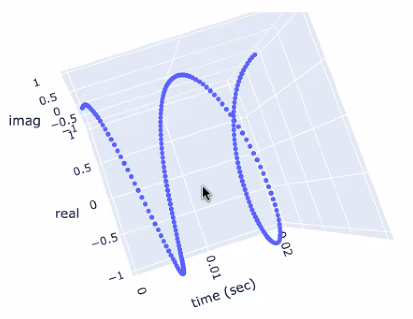

오일러 공식))
e^쎄타i는 cos(쎼타)+sin(쎼타)i

세상에서 제일 아름다운 식 e^(pi i) +1=0
e,pi,i,1,0 모두 상수인데 이것의 관계가 다 있따~

In [ ]:
ipd.Audio(c.imag, rate=sr)
#아까랑 똑같음ㅋ
#c.real 값도 가능~

In [ ]:
ipd.Audio(c.real, rate=sr)
#소리 같네? 아니 이거 뭐임 아깐 더 높았잖아;

In [ ]:
def phasor_sine(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  s = amp * np.sin(theta)

  return s, t, theta

  #함수 만듦. 싸인곡선 이용~ / 입력 출력 이렇게 하고

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440
s, t, theta = phasor_sine(amp, sr, dur, freq)
ipd.Audio(s, rate=sr)

#이용방법
#freq 높이면 소리 높아져.

In [22]:
def phasor_complex(amp, sr, dur, freq):

  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq   
  c = amp * np.exp(theta*1j)

  return c, t, theta

  #complex phasor.  c값만 다르죵

In [23]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

#싸인값만 보겠다~ c.real로 하면 코싸인만!!. 근데 둘다 똑같음 소리는. phase 차이 있지만 소리 차이 놉

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

#위에위에 거랑 같은 거 알지? 300보다는 높고.

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.imag, rate=sr)

#싸인값만 보겠다~ c.real로 하면 코싸인만!!. 근데 둘다 똑같음 소리는. phase 차이 있지만 소리 차이 놉

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 300.0
c, t, theta = phasor_complex(amp, sr, dur, freq)
ipd.Audio(c.real, rate=sr)

#위에랑 소리 같음

# Generate pulse train (=source)

f0 가 100이면 200,300~ 배음 만들어져 그것의 합이 성대에서 나는 pulse train! sr과 관련이 있어~

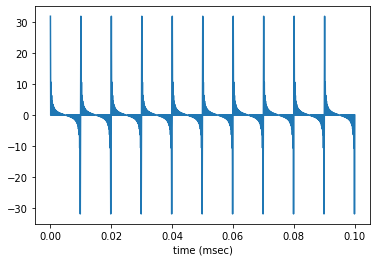

In [ ]:
# parameter setting
amp = 1
sr = 10000
dur = 0.5

F0 = 100
Fend = int(sr/2)  #int 아니면 에러 나더라/// Nyquist frequency- 표현할 수 있는 주파수가 sr의 반까지임.

s_all = 0
for freq in range(F0, Fend+1, F0): #freq 바꾸는 for loop -> 300부터 5001까지 by 100 increment
  s, t, theta = phasor_sine(amp, sr, dur, freq)
  s_all += s

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s_all[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s_all, rate=sr)

#싸인 웨이브 아니죠. 지저분하긴 해도 pulse처럼 보이긴 함

공돌이의 수학정리노트

* 시간 샘플링과 나이퀴스트 이론
* 마우스 움직여서 점이 더 많이 생기면 sr 높은겨

최소한의 표현을 하려면 sr이 너무 적으면 안 돼.
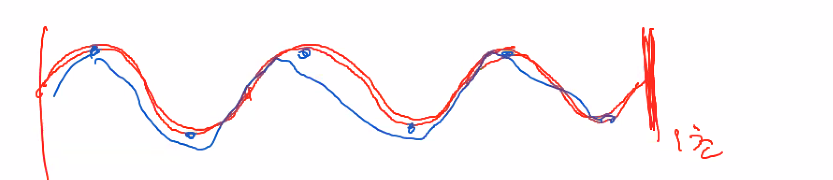

그래도 두 배는 되어야 sr이 되어야 함.

# Filter source

pulse train=harmonics=source

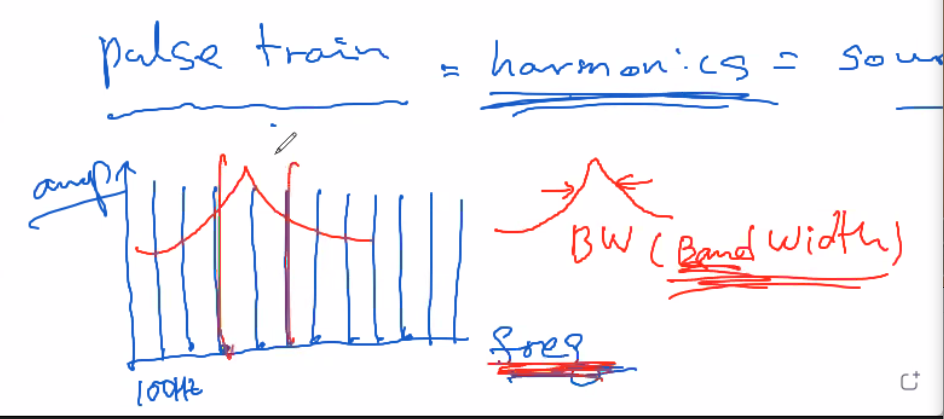
band width가 크면 산맥이 좀 둔하고 작으면 뾰족!

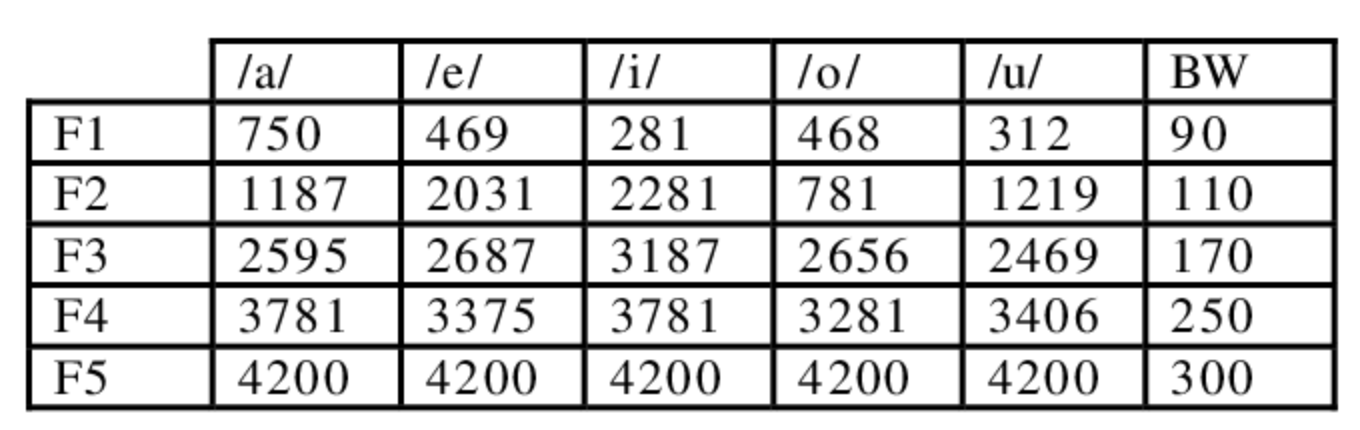

In [ ]:
def hz2w(F, sr): #Herz to omega라고 읽어
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b
    
#이건 안 가르칠 겁니다~ 필터 만드는 데 쓸거임!

In [ ]:
s = s_all

아 모음인데, 하나씩 f0 f1 f2 f3 f4임/ f5안 함

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)


#무슨 모음인지는 모르겠지만 진짜 성대에서 나는 느낌임!
#gradually 줄어듦

In [ ]:
RG = 750  # RG is the frequency of the 1st Formant
BWG = 90  # BWG is the bandwidth of the 1st Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1187  # RG is the frequency of the 2nd Formant
BWG = 110  # BWG is the bandwidth of the 2nd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2595  # RG is the frequency of the 3rd Formant
BWG = 170  # BWG is the bandwidth of the 3rd Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3781  # RG is the frequency of the 4th Formant
BWG = 250  # BWG is the bandwidth of the 4th Formant
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
#입술 구현
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

#브래슨, 트럼본 같은 거 앞 부분이 나팔 느낌임/.관악기는 모두 입술 느낌으로 생김-> radition 효과/증폭 효과

# load wav

In [2]:
from google.colab import files #컴에 있는 파일 콜랩에 업로드
!rm *.wav    #rm: remove. *.wav는 저런 이름 갖고 있는 거 다 없애~ 이거 안 하고 한 번 더 하면 (1) 같은 게 뜨거든 그래서 콜랩에 있는 wav 파일을 지워야 함!!
tmp = files.upload() # 이거 하면 파일 선택~ 떠서 a.wav 업로드~
fn = list(tmp)[0]

rm: cannot remove '*.wav': No such file or directory


Saving a.wav to a.wav


In [3]:
type(tmp)

dict

In [4]:
tmp # 뒤에는 wav 파일에 대한 정보 쭉 들어있는 거야 이건 중요하지 않고 파일 네임을 쓰기 위해 한 거임!

{'a.wav': b'RIFFH"\x00\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x10\'\x00\x00 N\x00\x00\x02\x00\x10\x00data$"\x00\x00#\xfb\xa5\xf8\x89\xf9\n\xfae\xfb\x1a\xfc\x9f\xfb\x0c\xfb\xef\xfa\x03\xfb\xa3\xfb)\xfc\xb3\xfcA\xfc\x80\xfb:\xfb\xc8\xfbN\xfcy\xfd\x0b\xfdu\xfc.\xfb\xd9\xf9@\xf9X\xfc\x90\x05\xf0\x118\x19V\x1a\xf9\x13\x87\x06T\xf9\x96\xf2\xb1\xf4\x84\xfe\xb7\t?\x13\x9b\x18P\x15\xa6\r\xf7\x06-\x03\x8e\x01\x13\x01W\x00\xb3\x00a\xff\xab\xfd\xd0\xff\x9d\x04\x19\t\xac\x0b"\x0b\xa5\x08\xa2\x03\xe2\xfc/\xfaC\xfb=\xfe\xf1\x01\xa9\x05\xbb\x06\x8c\x05\x06\x02\xf5\xfe\xa9\xfd\xb5\xfdA\xfd\xa7\xfds\xfd\xc0\xfb4\xfa\xc2\xf9\xcb\xfa\xce\xfd\xcb\xfe\\\xff\x87\xff>\xfd\xd8\xfa\x05\xfa:\xfa\xe1\xfb\x0c\xfe\x92\xfe[\xffo\xfe\xde\xfcK\xfd\x95\xfe\xff\xff\xe3\x00\x18\x00\x14\xfe}\xfb\xd8\xf8\x9e\xf8\x05\xfb~\xfd\x96\xff\xf0\xff\x8e\xfe\x1a\xfc0\xf9\xc6\xf7\xf6\xf8f\xfb-\xfdH\xfe\x85\xfd\x7f\xfb\x81\xf9\xe6\xf8\xc5\xf9\xf7\xfb\x8a\xfd\xe7\xfe\xd1\xfe.\xfd\xea\xfa\xa4\xfaN\xfb\x82\xfc=\xfd\xd3\xfcA\xfc\x06\

In [5]:
list(tmp) #dict로 쓰기 싫어서 이렇게 할거야. 이게 마지막 줄에 해당하는 거!

['a.wav']

In [6]:
fn

'a.wav'

In [10]:
from scipy.io import wavfile #방금 한 거 불러오기 위해 
sr, s = wavfile.read(fn) #이 함수로 wavfile 불러오고 sr,s 지정
nSamp = len(s) #얜 s의 크기/길이->4370개
dur = nSamp / sr #1초에 10000의 sr, 10000에 비해 4370이면 0.437초->그것이 총 duration
t = np.linspace(1/sr, dur, nSamp) #linspace(만분의 일,0.437, 4370)는 처음 수부터 두번째 수까지 몇 등분 해라~

In [8]:
sr

10000

In [9]:
s

array([-1245, -1883, -1655, ...,  1485,   697,   -65], dtype=int16)

In [12]:
t #첫 숫자 만 분의 일, 마지막 0.437, 총 4370개

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.368e-01, 4.369e-01,
       4.370e-01])

In [13]:
len(t)

4370

In [11]:
ipd.Audio(s, rate=sr)

Text(0, 0.5, 'amplitude')

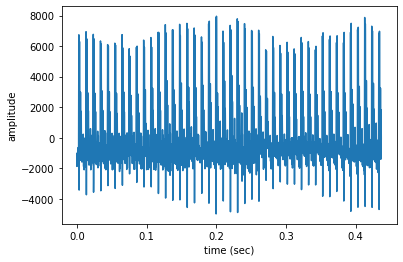

In [14]:
#플랏해볼겡
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, s) #얘가 핵심 x,y축!!1
ax.set_xlabel('time (sec)')
ax.set_ylabel('amplitude')

프랏에서 '아'파일 불러오면
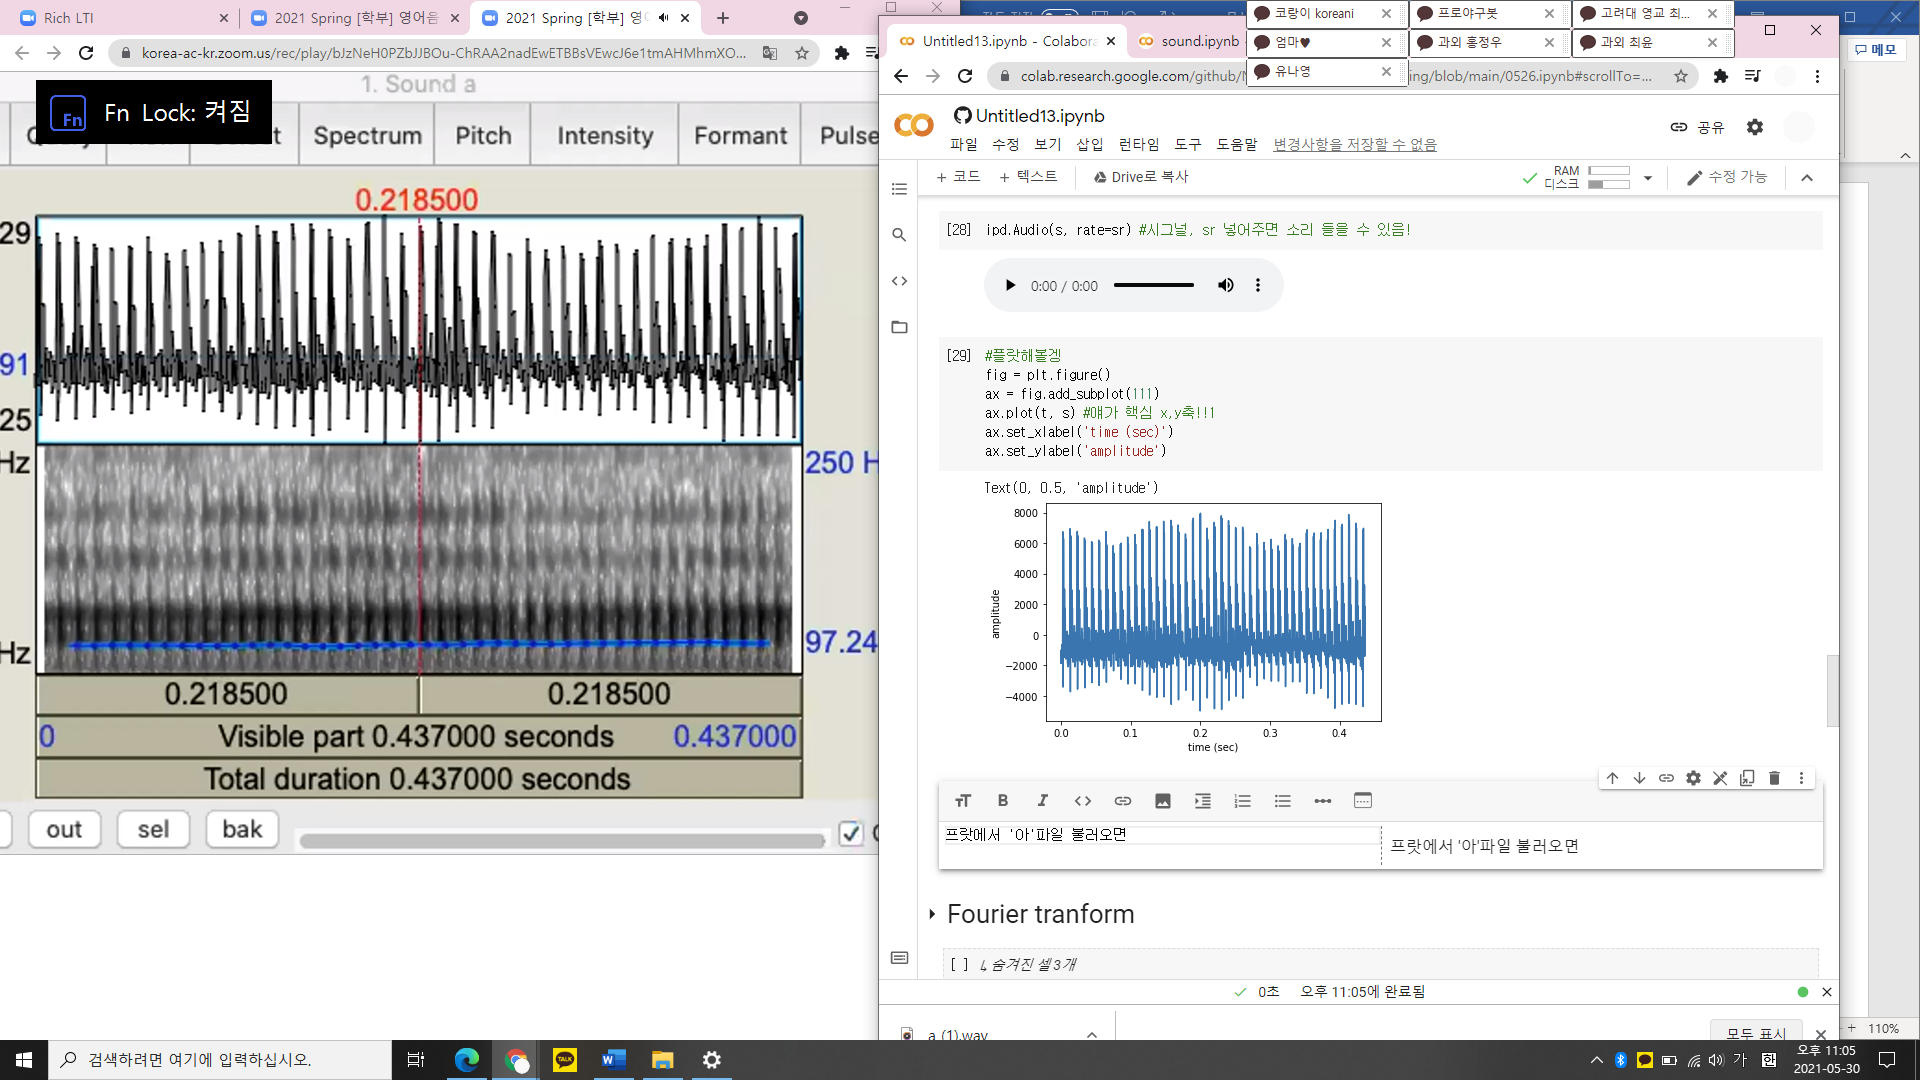

위에 waveform, 아래 스펙토그램
우리가 만든 거랑 프랏이랑 똑같죠!

# Fourier tranform

In [15]:
# ignore this!!!
# 
# nFFT = nSamp
# amp = [];
# for n in range(0,nFFT):
#     omega = 2*np.pi*n/nFFT # angular velocity
#     z = np.exp(omega*1j)**(np.arange(0,nSamp))
#     amp.append(np.abs(np.dot(s,z)))

In [25]:
nFFT = 512 #일반적으로 많이 쓰는 숫자~
freq = [];
amp = [];
for n in range(1,nFFT+1): 
    freq.append(sr*n/nFFT)
    c, t, theta = phasor_complex(1, sr, dur, freq[-1]) #phasor_complex이 부분이 핵심. #컴플렉스 페이저 만드는 거.입력은 amp,sr,dur,freq인데 출력은 컴플렉스값(복소수-실수부:코싸인값, 허수부:싸인값), 타임, 각도값
    amp.append(np.abs(np.dot(s,c)))

ValueError: ignored

위에꺼. 
싸인웨이브는 하면 안 된다 했으니 저걸로 할거야

512개의 다양한 freq 만들거임. 고주파부터 저주파~

최고주파: sr. 최저주파:sr/512

루프 돌 떄마다 n이 1부터 512까지. freq.append(sr*n/nFFT)얜 512분의 1곱sr,2,... 512/512곱 sr니까 sr, 맨 앞은 512분의1 곱sr-> 총 512개 만들어짐. 



freq[-1]는 the most recently appended one!

 amp.append(np.abs(np.dot(s,c))) -> abs는 절대값, dot은 닷  프로덕트, c는 컴플렉스값, s는 위에서 로드한 저거 

 두 개 닷프로덕트 하면 값 하나 나옴. 이때 중요한 거 둘의 닷프 하려면 길이 똑같아야 함!! 근데 쟤네 4370짜리니까 같음~

나온 것은 컴플랙스 밸류인데, 그것의 절대값은 그 길이. 그걸 amp에 계속 저장~

즉, fre 계속 저장, amp도 저장, 총 512개씩

Text(0, 0.5, 'amplitude')

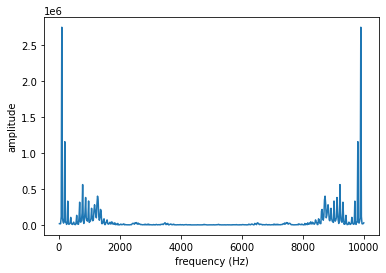

In [ ]:
#플라팅
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(freq, amp) #512개의 x값. 제일 첫:10000/512 마지막:10000-각각의 amp값이 y축
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

10000은 사람이 못 듣지 않니? 
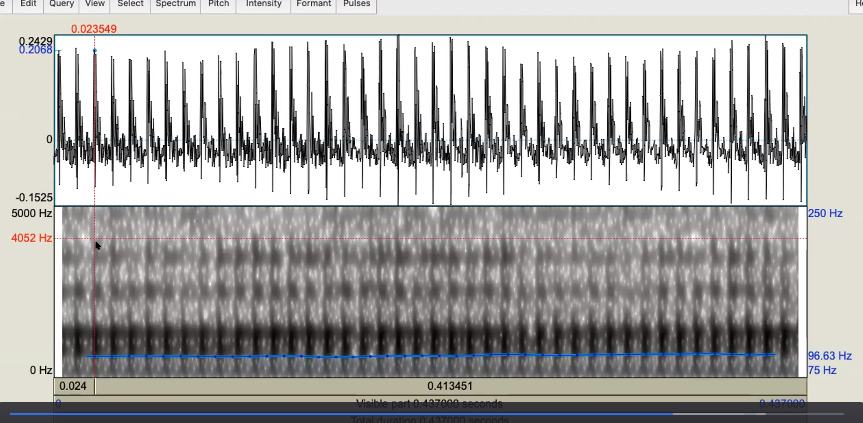

저기서 한 슬라이스가 스펙트럼, 진한 부분은 닷프 결과 높은 것, 연한 건 값이 낮은 거

사람이 여러 성분의 소리 만들어냄. 이건 기본 주파수(120헤르쯔)이랑 다른겨

그리고 사람이 듣는 거랑 말하는 거랑 또 다르고

그리고 sr 10000인데 저긴 5000헤르쯔까지만 표시. 왜냠ㄴ 아까 본 그래프에서도 반 기준으로 좌우 똑같!!! 그래서 필요 없는겨-> 5000까지만 의미가 있다. 

놉~

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

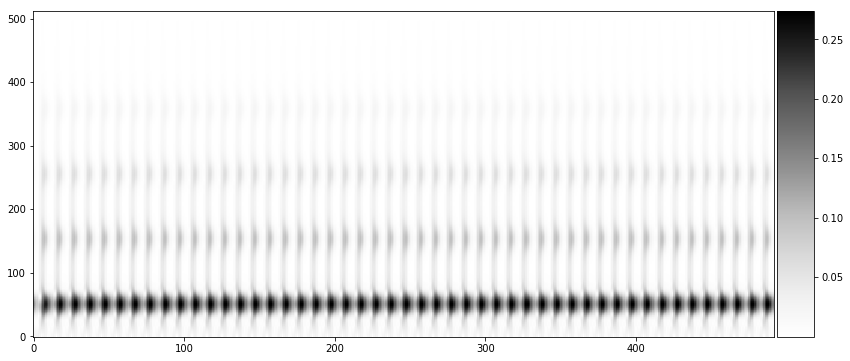

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

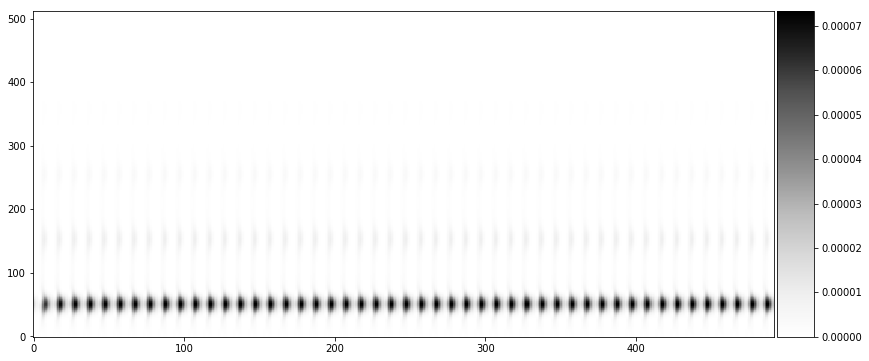

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

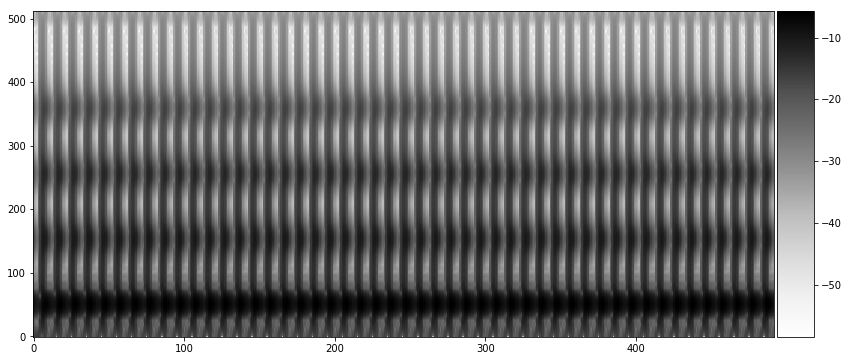

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

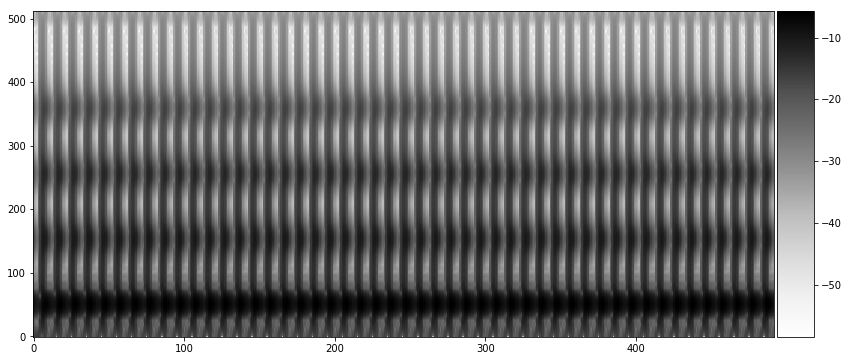

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);